In [23]:
with open('data.txt', 'r',encoding='utf-8') as all_articles:
    list_articles = list(all_articles)
    article_texts = []
    for element in list_articles:
        el = element[:-2]
        if '#####' not in element and 'URL: ' not in element and 'Автор: ' not in element and 'Название статьи: ' not in element and 'Источник: ' not in element and 'Дата: ' not in element and 'Автор не указан' not in element and 'Название не указано' not in element:
            article_texts.append(element)

In [ ]:
from itertools import permutations
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import networkx as nx
import matplotlib.pyplot as plt

nltk.download('all')
cosine_similarity = {}
sw = stopwords.words('russian')
a = []
pairs = []
for item in permutations(article_texts, 2):
    X = item[0]
    Y = item[1]
    X_list = word_tokenize(X) 
    Y_list = word_tokenize(Y)
    rvector = set(X_list).union(set(Y_list)) 

    l1 = []
    l2 = []
    for w in rvector:
        if w in set(X_list): 
            l1.append(1) 
        else: l1.append(0)
        if w in set(Y_list): 
            l2.append(1)
        else: 
            l2.append(0)
    
    c = 0

    for i in range(len(rvector)):
        c += l1[i]*l2[i]
    if float((sum(l1)*sum(l2))**0.5) != 0:
        cosine = c / float((sum(l1)*sum(l2))**0.5)
    else:
        cosine = 0
    G=nx.Graph()
    if cosine >= 0.8:
        if [X, Y, cosine] not in a and [Y, X, cosine] not in a:
            a.append([X, Y, cosine])


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\r

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     C:\Users\ra4wv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np


def buildGraph(a, thr = 0.):
    G1=nx.Graph()
    for i in a:
        if float(i[2]) >= thr:
            G1.add_edge(i[0], i[1])
    return G1

In [13]:
def drawGraph(G):
    pstn=nx.spring_layout(G)
    _=nx.draw(G, pos=pstn, with_labels=True, node_color='r', edge_color='g')

In [14]:
def buildAndDrawGraph(a, thr = 0.):
    G1 = buildGraph(a, thr)
    drawGraph(G1)
    return G1

<IPython.core.display.Javascript object>


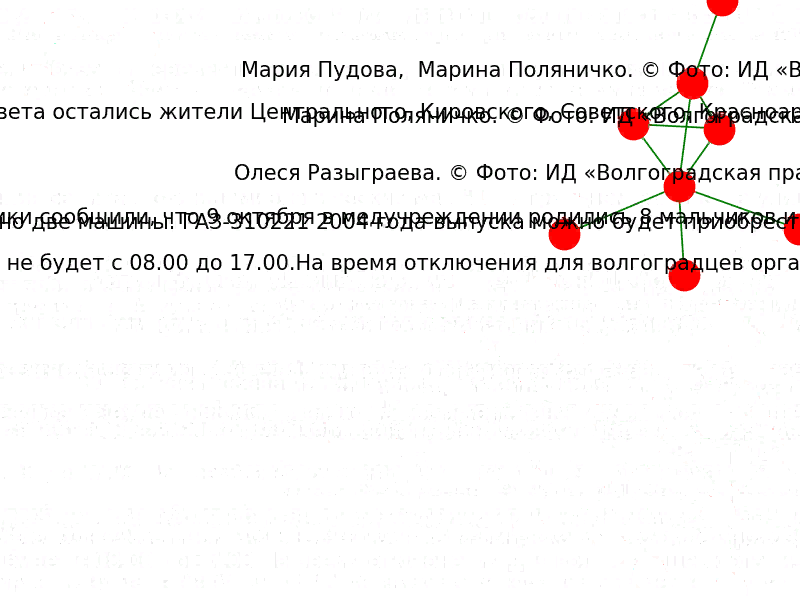

In [15]:
buildAndDrawGraph(people)